In [196]:
#Topic:        Challenge Set 1
#Subject:      Explore MTA turnstile data
#Date:         01/16/2018
#Name:         Bradley Davies
#Worked with:  None

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import csv
import io
import requests
from datetime import datetime
import collections
from collections import Counter
from collections import defaultdict

#Challenge 1:
theDict = defaultdict(list)

with open('turnstile_180106.txt') as csvfile:
    x = csv.reader(csvfile)
    next(x)
    
    for i in x:
        theDict[tuple(i[:4])].append(i[4:])
        
with open('turnstile_180113.txt') as csvfile:
    x = csv.reader(csvfile)
    next(x)
    
    for i in x:
        theDict[tuple(i[:4])].append(i[4:])

In [197]:
len(theDict)

4713

In [198]:
#Challenge 2:

datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in theDict.items()}

In [200]:
# sort by date
#for rows in datetime_cumulative.values():
#    assert rows == sorted(rows)
    
sorted(datetime_cumulative.items(), key=lambda x:x[1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [201]:
datetime_count_times = {turnstile: [[rows[i][0], # datetime first
                                      # delta on entries
                                     rows[i+1][1] - rows[i][1],
                                     # delta on datetime
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [202]:
list(datetime_count_times.values())[0:4]

[[[datetime.datetime(2017, 12, 30, 3, 0), 10, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 30, 7, 0), 59, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 30, 11, 0), 195, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 30, 15, 0), 339, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 30, 19, 0), 175, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 30, 23, 0), 39, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 31, 3, 0), 12, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 31, 7, 0), 42, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 31, 11, 0), 158, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 31, 15, 0), 199, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 31, 19, 0), 106, datetime.timedelta(0, 14400)],
  [datetime.datetime(2017, 12, 31, 23, 0), 32, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 1, 3, 0), 16, datetime.timedelta

In [203]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print(all_counts[-50:])

[2820, 2822, 2824, 2825, 2827, 2876, 2877, 2886, 2887, 2900, 2910, 2988, 2997, 3009, 3025, 3030, 3032, 3040, 3056, 3117, 3122, 3143, 3148, 3168, 3215, 3257, 3305, 3326, 3346, 3369, 3398, 3425, 3461, 3553, 5212, 76768, 77777, 273424, 1310720, 1947497, 3934520, 3938074, 4846985, 8126343, 11501345, 11501506, 11501562, 11501828, 11502006, 48783827]


In [204]:
print(all_counts[:1200])

[-117245125, -50388363, -48783215, -11501708, -11501554, -11501452, -11501333, -11501106, -11317398, -8126327, -4895129, -4846819, -3937942, -3934204, -1947463, -1697601, -1324042, -1310720, -541390, -480341, -356016, -293218, -196547, -175442, -146073, -139732, -132601, -86947, -77679, -76588, -51572, -35838, -33443, -25654, -24504, -18931, -15643, -14364, -5821, -5327, -3437, -3327, -3241, -3107, -3097, -2917, -2890, -2716, -2657, -2430, -2320, -2250, -2197, -2182, -2166, -2156, -2142, -2120, -2118, -2117, -2114, -2080, -2069, -2057, -2050, -2047, -2045, -2041, -2022, -2009, -2006, -1989, -1987, -1981, -1957, -1956, -1919, -1889, -1883, -1869, -1848, -1790, -1774, -1741, -1729, -1714, -1712, -1701, -1700, -1691, -1679, -1675, -1670, -1665, -1648, -1640, -1608, -1606, -1601, -1594, -1593, -1555, -1546, -1542, -1541, -1537, -1525, -1520, -1505, -1487, -1473, -1471, -1470, -1462, -1452, -1450, -1440, -1433, -1431, -1431, -1428, -1420, -1417, -1408, -1396, -1395, -1371, -1363, -1358, -13

In [205]:
# Time intervals? 

all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print(Counter(all_times).most_common(10))

[(4.0, 358092), (4.2, 23879), (0.02222222222222222, 1253), (0.022500000000000003, 880), (8.0, 452), (4.433333333333334, 290), (0.023055555555555555, 173), (0.02277777777777778, 162), (0.023611111111111114, 144), (0.02333333333333333, 102)]


In [206]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}

In [207]:
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print(len(all_good_counts) / len(all_counts))

0.9917420102248974


In [208]:
all_good_counts.sort()
print(all_good_counts[-5:])

[3369, 3398, 3425, 3461, 3553]


In [209]:
print(all_good_counts[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [210]:
list(datetime_counts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2017, 12, 30, 3, 0), 10),
  (datetime.datetime(2017, 12, 30, 7, 0), 59),
  (datetime.datetime(2017, 12, 30, 11, 0), 195),
  (datetime.datetime(2017, 12, 30, 15, 0), 339),
  (datetime.datetime(2017, 12, 30, 19, 0), 175),
  (datetime.datetime(2017, 12, 30, 23, 0), 39),
  (datetime.datetime(2017, 12, 31, 3, 0), 12),
  (datetime.datetime(2017, 12, 31, 7, 0), 42),
  (datetime.datetime(2017, 12, 31, 11, 0), 158),
  (datetime.datetime(2017, 12, 31, 15, 0), 199),
  (datetime.datetime(2017, 12, 31, 19, 0), 106),
  (datetime.datetime(2017, 12, 31, 23, 0), 32),
  (datetime.datetime(2018, 1, 1, 3, 0), 16),
  (datetime.datetime(2018, 1, 1, 7, 0), 26),
  (datetime.datetime(2018, 1, 1, 11, 0), 106),
  (datetime.datetime(2018, 1, 1, 15, 0), 183),
  (datetime.datetime(2018, 1, 1, 19, 0), 101),
  (datetime.datetime(2018, 1, 1, 23, 0), 12),
  (datetime.datetime(2018, 1, 2, 3, 0), 15),
  (datetime.datetime(2018, 1, 2, 7, 0), 151),
  (datetime.da

In [340]:
#Challenge 3:

# dictionary of dictionaries
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())
    

list(day_counts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.date(2017, 12, 30), 817),
  (datetime.date(2017, 12, 31), 549),
  (datetime.date(2018, 1, 1), 444),
  (datetime.date(2018, 1, 2), 1484),
  (datetime.date(2018, 1, 3), 1574),
  (datetime.date(2018, 1, 4), 832),
  (datetime.date(2018, 1, 5), 1407),
  (datetime.date(2018, 1, 6), 627),
  (datetime.date(2018, 1, 7), 498),
  (datetime.date(2018, 1, 8), 1431),
  (datetime.date(2018, 1, 9), 1513),
  (datetime.date(2018, 1, 10), 1511),
  (datetime.date(2018, 1, 11), 1559),
  (datetime.date(2018, 1, 12), 1471)])

In [341]:
list(day_counts['A002', 'R051', '02-00-00', '59 ST'])

[(datetime.date(2017, 12, 30), 817),
 (datetime.date(2017, 12, 31), 549),
 (datetime.date(2018, 1, 1), 444),
 (datetime.date(2018, 1, 2), 1484),
 (datetime.date(2018, 1, 3), 1574),
 (datetime.date(2018, 1, 4), 832),
 (datetime.date(2018, 1, 5), 1407),
 (datetime.date(2018, 1, 6), 627),
 (datetime.date(2018, 1, 7), 498),
 (datetime.date(2018, 1, 8), 1431),
 (datetime.date(2018, 1, 9), 1513),
 (datetime.date(2018, 1, 10), 1511),
 (datetime.date(2018, 1, 11), 1559),
 (datetime.date(2018, 1, 12), 1471)]

In [342]:
import matplotlib.pyplot as plt
%matplotlib inline

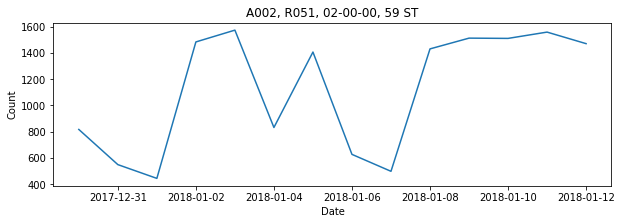

In [343]:
dates = [date[0] for date in day_counts['A002', 'R051', '02-00-00', '59 ST']]
counts = [count[1] for count in day_counts['A002', 'R051', '02-00-00', '59 ST']]

plt.figure(figsize=(10,3))
plt.title('A002, R051, 02-00-00, 59 ST')
plt.xlabel('Date')
plt.ylabel('Count')

plt.plot(dates,counts)

In [344]:
day_counts['A002', 'R051', '02-00-00', '59 ST'][0][1]

817

In [346]:
data

[(datetime.date(2018, 1, 9), 95),
 (datetime.date(2018, 1, 10), 153),
 (datetime.date(2018, 1, 11), 135),
 (datetime.date(2018, 1, 12), 147)]

In [351]:
#Challenge 5:


In [352]:
threeway_rollup = collections.defaultdict(list)

for index, data in day_counts.items():
    newindex = (index[0], index[1], index[3])
    threeway_rollup[newindex] += data
    
for index, data in threeway_rollup.items():
    turnstile_rollup = {}
    for date, count in data:
        turnstile_rollup[date] = turnstile_rollup.get(date, 0) + count
    threeway_rollup[index] = [[date, count] for date, count in turnstile_rollup.items()]

In [353]:
turnstile_rollup

{datetime.date(2017, 12, 30): 2154,
 datetime.date(2017, 12, 31): 1924,
 datetime.date(2018, 1, 1): 2056,
 datetime.date(2018, 1, 2): 2573,
 datetime.date(2018, 1, 3): 2565,
 datetime.date(2018, 1, 4): 828,
 datetime.date(2018, 1, 5): 1711,
 datetime.date(2018, 1, 6): 1949,
 datetime.date(2018, 1, 7): 1605,
 datetime.date(2018, 1, 8): 1939,
 datetime.date(2018, 1, 9): 2123,
 datetime.date(2018, 1, 10): 2097,
 datetime.date(2018, 1, 11): 2204,
 datetime.date(2018, 1, 12): 1772}

In [354]:
list(threeway_rollup.items())

[(('A002', 'R051', '59 ST'),
  [[datetime.date(2017, 12, 30), 7840],
   [datetime.date(2017, 12, 31), 5908],
   [datetime.date(2018, 1, 1), 4703],
   [datetime.date(2018, 1, 2), 12747],
   [datetime.date(2018, 1, 3), 13691],
   [datetime.date(2018, 1, 4), 8369],
   [datetime.date(2018, 1, 5), 12413],
   [datetime.date(2018, 1, 6), 6855],
   [datetime.date(2018, 1, 7), 5222],
   [datetime.date(2018, 1, 8), 12904],
   [datetime.date(2018, 1, 9), 13816],
   [datetime.date(2018, 1, 10), 13692],
   [datetime.date(2018, 1, 11), 13747],
   [datetime.date(2018, 1, 12), 12551]]),
 (('A006', 'R079', '5 AV/59 ST'),
  [[datetime.date(2017, 12, 30), 6779],
   [datetime.date(2017, 12, 31), 4694],
   [datetime.date(2018, 1, 1), 3513],
   [datetime.date(2018, 1, 2), 10585],
   [datetime.date(2018, 1, 3), 11438],
   [datetime.date(2018, 1, 4), 7329],
   [datetime.date(2018, 1, 5), 10357],
   [datetime.date(2018, 1, 6), 4428],
   [datetime.date(2018, 1, 7), 3611],
   [datetime.date(2018, 1, 8), 10982],


In [359]:
#Challenge 6:

station_rollup = collections.defaultdict(list)

for index, data in threeway_rollup.items():
    newindex = (index[2])
    station_rollup[newindex] += data
    
for index, data in station_rollup.items():
    second_rollup = {}
    for date, count in data:
        second_rollup[date] = second_rollup.get(date, 0) + count
    station_rollup[index] = [[date, count] for date, count in second_rollup.items()]

In [361]:
list(station_rollup.items())[0]

('59 ST',
 [[datetime.date(2017, 12, 30), 35902],
  [datetime.date(2017, 12, 31), 27069],
  [datetime.date(2018, 1, 1), 19077],
  [datetime.date(2018, 1, 2), 59122],
  [datetime.date(2018, 1, 3), 65515],
  [datetime.date(2018, 1, 4), 37344],
  [datetime.date(2018, 1, 5), 58363],
  [datetime.date(2018, 1, 6), 30309],
  [datetime.date(2018, 1, 7), 22979],
  [datetime.date(2018, 1, 8), 63847],
  [datetime.date(2018, 1, 9), 67920],
  [datetime.date(2018, 1, 10), 67075],
  [datetime.date(2018, 1, 11), 67676],
  [datetime.date(2018, 1, 12), 61718]])

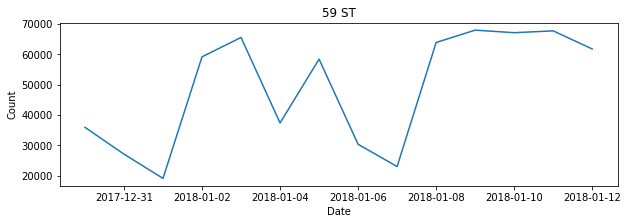

In [362]:
#Challenge 7
dates = [date[0] for date in station_rollup['59 ST']]
counts = [count[1] for count in station_rollup['59 ST']]

plt.figure(figsize=(10,3))
plt.title('59 ST')
plt.xlabel('Date')
plt.ylabel('Count')

plt.plot(dates,counts)

In [378]:
#Challenge 8:

station_week_total = collections.defaultdict(list)


for index, data in station_rollup.items():
    week_rollup = {}
    for date, count in data:
        week_rollup[date.weekday()] = second_rollup.get(date.weekday(), 0) + count
    station_week_total[index] = [[date, count] for date, count in week_rollup.items()]


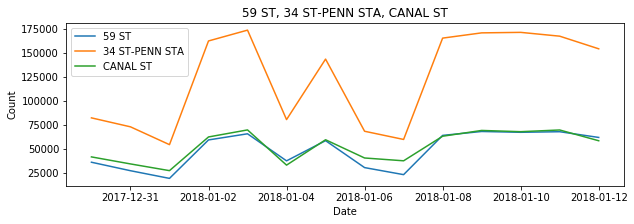

In [384]:
date1 = [date[0] for date in station_rollup['59 ST']]
count1 = [count[1] for count in station_rollup['59 ST']]

date2 = [date[0] for date in station_rollup['34 ST-PENN STA']]
count2 = [count[1] for count in station_rollup['34 ST-PENN STA']]

date3 = [date[0] for date in station_rollup['CANAL ST']]
count3 = [count[1] for count in station_rollup['CANAL ST']]


plt.figure(figsize=(10,3))
plt.title('59 ST, 34 ST-PENN STA, CANAL ST')
plt.xlabel('Date')
plt.ylabel('Count')

plt.plot(date1,count1)
plt.plot(date2,count2)
plt.plot(date3,count3)
plt.legend(['59 ST', '34 ST-PENN STA', 'CANAL ST'], loc='upper left')

In [379]:
#Challenge 9:
station_total = {}

for station, data in station_rollup.items():
    if station not in station_total:
        station_total[station] = 0
        for date, count in data:
            station_total[station] += count
    else:
        for date, count in data:
            station_total[station] += count
            

In [380]:
sorted(station_total.items(), key=lambda x:x[1], reverse=True)

[('34 ST-PENN STA', 1724184),
 ('GRD CNTRL-42 ST', 1517314),
 ('34 ST-HERALD SQ', 1160149),
 ('23 ST', 1096933),
 ('14 ST-UNION SQ', 1062561),
 ('TIMES SQ-42 ST', 1012906),
 ('42 ST-PORT AUTH', 1009072),
 ('FULTON ST', 976891),
 ('86 ST', 924564),
 ('125 ST', 752271),
 ('CANAL ST', 731860),
 ('59 ST COLUMBUS', 711521),
 ('59 ST', 683916),
 ('96 ST', 657436),
 ('47-50 STS ROCK', 606051),
 ('FLUSHING-MAIN', 601617),
 ('14 ST', 558467),
 ('CHAMBERS ST', 548833),
 ('50 ST', 545608),
 ('PATH NEW WTC', 536350),
 ('JKSN HT-ROOSVLT', 528816),
 ('28 ST', 502722),
 ('ATL AV-BARCLAY', 497453),
 ('72 ST', 485538),
 ('W 4 ST-WASH SQ', 411345),
 ('WALL ST', 407703),
 ('42 ST-BRYANT PK', 404190),
 ('JAY ST-METROTEC', 399454),
 ('7 AV', 390230),
 ('LEXINGTON AV/53', 380652),
 ('145 ST', 378820),
 ('CHURCH AV', 378674),
 ('8 AV', 365727),
 ('116 ST', 357589),
 ('JAMAICA CENTER', 355820),
 ('DEKALB AV', 350948),
 ('57 ST-7 AV', 347936),
 ('BOROUGH HALL', 347525),
 ('77 ST', 341906),
 ('103 ST', 330614),

(array([ 60.,  95.,  52.,  39.,  29.,  23.,  14.,  13.,   8.,   2.,   8.,
          6.,   0.,   0.,   3.,   4.,   1.,   2.,   0.,   2.,   1.,   2.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,   1.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  7.92000000e+02,   3.52598400e+04,   6.97276800e+04,
          1.04195520e+05,   1.38663360e+05,   1.73131200e+05,
          2.07599040e+05,   2.42066880e+05,   2.76534720e+05,
          3.11002560e+05,   3.45470400e+05,   3.79938240e+05,
          4.14406080e+05,   4.48873920e+05,   4.83341760e+05,
          5.17809600e+05,   5.52277440e+05,   5.86745280e+05,
          6.21213120e+05,   6.55680960e+05,   6.90148800e+05,
          7.24616640e+05,   7.59084480e+05,   7.93552320e+05,
          8.28020160e+05,   8.62488000e+05,   8.96955840e+05,
          9.31423680e+05,   9.65891520e+05,   1.00035936e+06,
          1.03482720e+06,   1.06929504

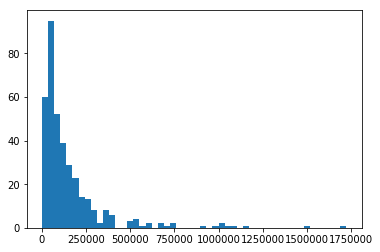

In [381]:
#Challenge 10
total_ridership_counts = []

for x in station_total.items():
    total_ridership_counts.append(x[1])
    
plt.hist(total_ridership_counts, bins=50)

/Users/bradleydavies/Metis_Coursework/nyc18_ds14/student_submissions/challenges/00_practice/davies_brad
